# Diabetes Prediction of Pima Indian Women
- By Valentine Ezenwanne

# Project Introduction
- Diabetes is a condition that happens when your blood sugar (glucose) is too high. It develops when your pancreas doesn’t make enough insulin or any at all, or when your body isn’t responding to the effects of insulin properly. 
- Globally, diabetes affects 537 million people, making it the deadliest and the most common non‐communicable disease. 
- Many factors can cause a person to get affected by diabetes, like excessive body weight, abnormal cholesterol level, family history, physical inactivity, bad food habit etc. Increased urination is one of the most common symptoms of this disease. 
- People with diabetes for a long time can get several complications like heart disorder, kidney disease, nerve damage, diabetic retinopathy etc. But its risk can be reduced if it is predicted early. 


# Project Objectives
- The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain 
diagnostic measurements included in the dataset.
- To determine the features that are best suited for predicting diabetes in the women

# Dataset Description
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. 
- The dataset contain patients all females at least 21 years old of Pima Indian heritage. It contain independent(several medical predictor variables) and only one target dependent variable (Outcome).

## Feature description
- Pregnancies: Indicates the number of pregnancies
- Glucose: indicates the plasma glucose concentration
- Blood Pressure: indicates diastolic blood pressure in mmHg
- Skin thickness: indicates triceps skinfold thickness in mm
- Insulin: indicates insulin in U/ml
- BMI: indicates the body mass index in kg/m2
- Diabetes Pedigree Function: indicates the function which score likelihood of diabetes based on family history
- Age: indicates the age of the person
- Outcome: indicates if the patient had a diabetes or not (1 = yes, 0 = n0)

# Import the package

In [1]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

## Load the dataset

In [2]:
#load the dataset
df = pd.read_csv('diabetes.csv')

In [3]:
#display few lines of the data
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


# Data Wrangling

In [4]:
#understanding the shape of the dataset
df.shape

(768, 9)

- There are 768 patients record and 9 features

In [5]:
#checking the datatypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

- The data are integers and float

In [6]:
#check for missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There are no missing values

In [7]:
#check for duplicates
df.duplicated().sum()

0

- There are no duplicates in the dataset

In [8]:
#Get the descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Feature Engineering
- Create necessary columns for visualization

### Creating an age-group column

In [9]:
#create an empty Age_bucket list
Age_Bucket = []

#create a for loop to group the age into ranges
for x in df['Age'].values:
    if x <= 30:
        i = '21 - 30'
        Age_Bucket.append(i)
    elif x <= 40:
        i = '31 - 40'
        Age_Bucket.append(i)
    elif x <= 50:
        i = '41 - 50'
        Age_Bucket.append(i)
    elif x <= 60:
        i = '51 - 60'
        Age_Bucket.append(i)
    elif x > 60:
        i = '60 +'
        Age_Bucket.append(i)

In [10]:
#create the age group column
df['AgeGroup'] = Age_Bucket

### Creating a column for weight group

In [11]:
# create an empty list
weight_bucket = []

#create a for loop for the weight group
for x in df['BMI'].values:
    if x < 18.5:
        i = 'Under-Weight'
        weight_bucket.append(i)
    elif x >=18.5 and x <=25.5:
        i = 'Normal'
        weight_bucket.append(i)
    elif x>25.5 and x<=30:
        i = 'Over-Weight'
        weight_bucket.append(i)
    elif x >30 and x<=40:
        i = 'Obese'
        weight_bucket.append(i)
    elif x >40:
        i = 'Morbid Obese'
        weight_bucket.append(i)

In [12]:
#create the weight_group column
df['WeightGroup'] = weight_bucket

### Creating a column for Gluose level group

In [13]:
# create an empty list
glucose_level = []

#create a for loop for the Glucose group
for x in df['Glucose'].values:
    if x < 100:
        i = 'Normal'
        glucose_level.append(i)
    elif x >=100 and x <=125:
        i = 'Pre-diabetic'
        glucose_level.append(i)
    elif x>125:
        i = 'Diabetic'
        glucose_level.append(i)
    

In [14]:
#create the diabetic group
df['GlucoseGroup'] = glucose_level

### Creating a column for hypertension level group

In [15]:
# create an empty list
bp_level = []

#create a for loop for the blood pressure group
for x in df['BloodPressure'].values:
    if x <=80:
        i = 'Normal BP'
        bp_level.append(i)
    elif x > 80:
        i = 'High BP'
        bp_level.append(i)
    

In [16]:
# create the blood pressure column
df['BpGroup'] = bp_level

### Create a diabetic group column

In [17]:
# create an empty list
Diabetic_group = []

#create a for loop for the Diabetic group
for x in df['Outcome'].values:
    if x == 1:
        i = 'Diabetic'
        Diabetic_group.append(i)
    elif x == 0:
        i = 'Non-Diabetic'
        Diabetic_group.append(i)
    

In [18]:
df['DiabeticGroup'] = Diabetic_group

In [19]:
#display few lines of the data
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,WeightGroup,GlucoseGroup,BpGroup,DiabeticGroup
0,6,148,72,35,0,33.6,0.627,50,1,41 - 50,Obese,Diabetic,Normal BP,Diabetic
1,1,85,66,29,0,26.6,0.351,31,0,31 - 40,Over-Weight,Normal,Normal BP,Non-Diabetic


# Data Exploration

## Univariate Exploration

### Plotting the distribution of age, pregnancies, blood pressure, skin thickness, insulin ang glucose

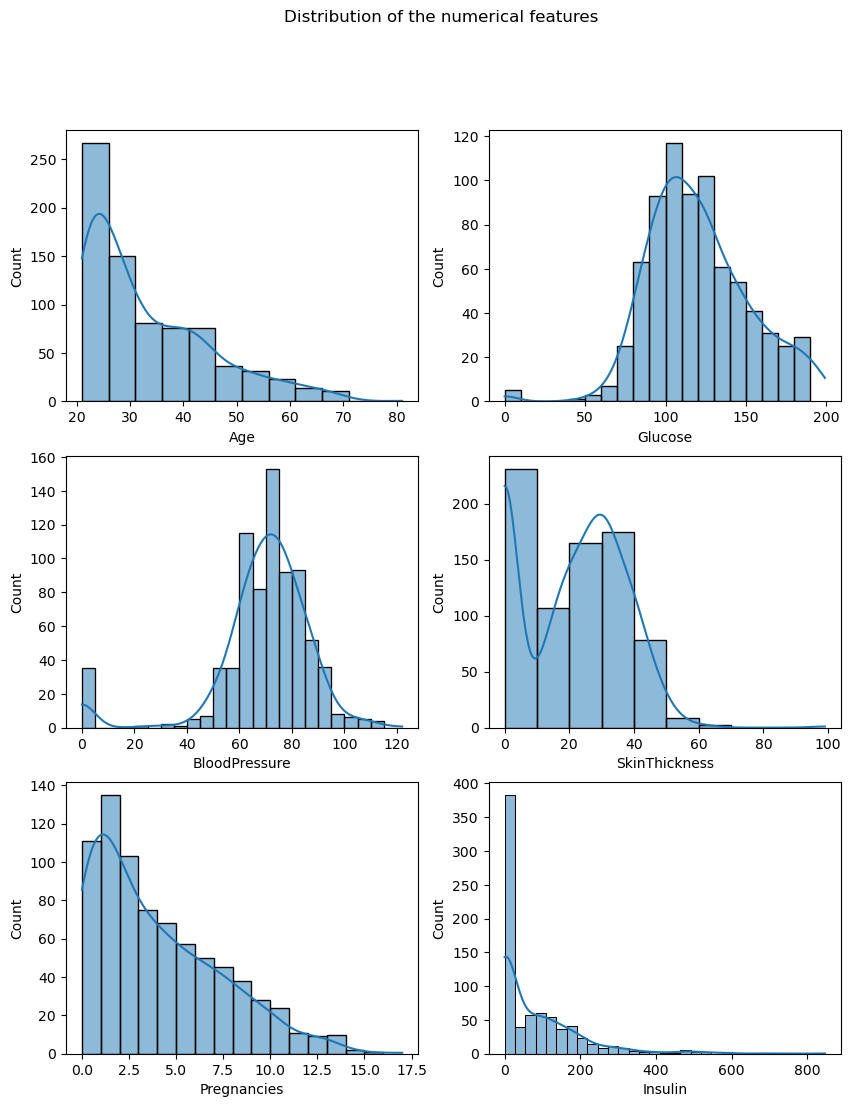

In [21]:
#plotting the distribution of age, pregnancies, blood pressure, skin thickness, insulin ang glucose level

fig, ax =  plt.subplots(3, 2, figsize=[10,12])
bins = np.arange(df['Age'].min(), df['Age'].max(), 5)
bins1 = np.arange(df['Glucose'].min(), df['Glucose'].max(), 10)
bins2 = np.arange(df['BloodPressure'].min(), df['BloodPressure'].max(), 5)
bins3 = np.arange(df['SkinThickness'].min(), df['SkinThickness'].max(), 10)
bins4 = np.arange(df['Pregnancies'].min(), df['Pregnancies'].max(), 1)

sns.histplot(data=df, x='Age', kde=True, ax=ax[0,0], bins=bins)
sns.histplot(data=df, x='Glucose', kde=True, ax=ax[0,1], bins=bins1)
sns.histplot(data=df, x='BloodPressure', kde=True, ax=ax[1,0], bins=bins2)
sns.histplot(data=df, x='SkinThickness', kde=True, ax=ax[1,1], bins=bins3)
sns.histplot(data=df, x='Pregnancies', kde=True, ax=ax[2,0], bins=bins4)
sns.histplot(data=df, x='Insulin', kde=True, ax=ax[2,1])

fig.suptitle('Distribution of the numerical features')
plt.show()

### From the histograms

- The majority of the patients are between 20 - 30 years, and the age is skewed to the right with an outlier above 80 years

- Most of the patients have blood glucose between 90 - 130, with mean around 110. There is an outlier at 0, which means that some patients have zero glucose which logically is impossible

- The blood pressure of most patients lies between 60 - 90 mmHg with an outlier at 0mmHg

- The skin thickness and insulin have value of zero. This can either be error and needs imputation with either mean or dropping the values


### Plotting the age group and diabetic group

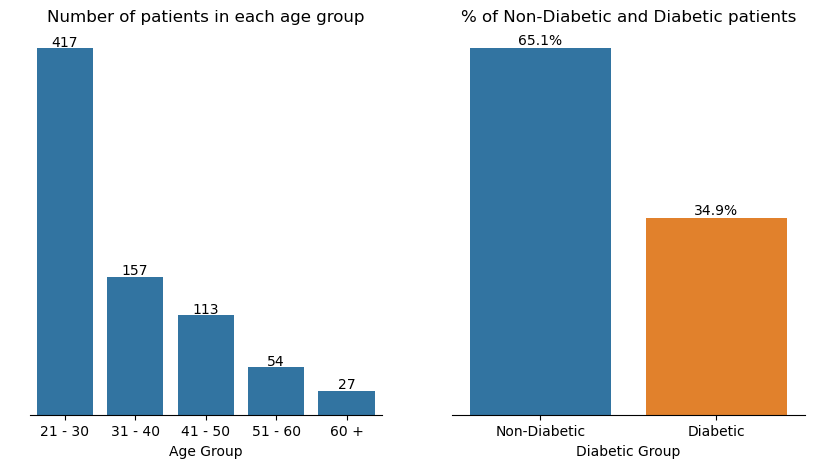

In [22]:
#plotting the distribution of age_group and diabetic

fig, ax =  plt.subplots(1, 2, figsize=[10,5])
sort_order = ['21 - 30', '31 - 40', '41 - 50', '51 - 60', '60 +']
sort_order2 = df['DiabeticGroup'].value_counts().index
color_order = sns.color_palette()[0]
sns.countplot(data=df, x='AgeGroup', ax=ax[0], order=sort_order, color=color_order)
sns.countplot(data=df, x='DiabeticGroup', ax=ax[1], order=sort_order2)

ax[0].set_title('Number of patients in each age group')
ax[0].set_yticks([])
ax[0].set_ylabel(' ')
ax[0].set_xlabel('Age Group')
ax[0].spines[['top', 'right', 'left']].set_visible(False)

ax[1].set_title('% of Non-Diabetic and Diabetic patients')
ax[1].set_yticks([])
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Diabetic Group')
ax[1].spines[['top', 'right', 'left']].set_visible(False)

for index, values in enumerate(df['AgeGroup'].value_counts().values):
    ax[0].annotate(values, xy=(index, values+7), ha='center', va='center')

for index, values in enumerate(df['DiabeticGroup'].value_counts().values):
    ax[1].annotate(str(round((values/768)*100, 2))+'%', xy=(index, values+10), ha='center', va='center')
plt.show()

### From the bar chart
- Majority of the patients are the age group of 21 -30 years
- 34.9% of the patients are diabetic while the rest are non-diabetic

### Plotting the Weight group, hypertension group and glucose group

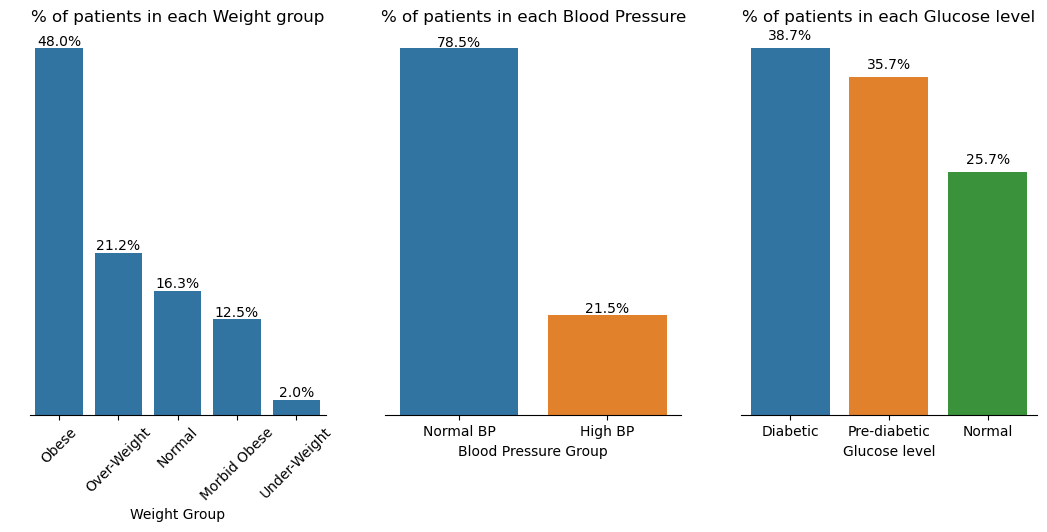

In [23]:
#Plotting the Weight group, hypertension group and glucose group
fig, ax =  plt.subplots(1, 3, figsize=[13,5])

color_order = sns.color_palette()[0]
sort_order = ['Diabetic', 'Pre-diabetic', 'Normal']
sns.countplot(data=df, x='WeightGroup', ax=ax[0], color=color_order)
sns.countplot(data=df, x='BpGroup', ax=ax[1])
sns.countplot(data=df, x='GlucoseGroup', ax=ax[2], order=sort_order)

ax[0].set_title('% of patients in each Weight group')
ax[0].set_yticks([])
ax[0].set_ylabel(' ')
ax[0].set_xlabel('Weight Group')
ax[0].spines[['top', 'right', 'left']].set_visible(False)
ax[0].xaxis.set_tick_params(rotation=45)


ax[1].set_title('% of patients in each Blood Pressure')
ax[1].set_yticks([])
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Blood Pressure Group')
ax[1].spines[['top', 'right', 'left']].set_visible(False)

ax[2].set_title('% of patients in each Glucose level')
ax[2].set_yticks([])
ax[2].set_ylabel(' ')
ax[2].set_xlabel('Glucose level')
ax[2].spines[['top', 'right', 'left']].set_visible(False)


for index, values in enumerate(df['WeightGroup'].value_counts().values):
    ax[0].annotate(str(round((values/768)*100, 1))+'%', xy=(index, values+7), ha='center', va='center')

for index, values in enumerate(df['BpGroup'].value_counts().values):
    ax[1].annotate(str(round((values/768)*100, 1))+'%', xy=(index, values+10), ha='center', va='center')
    
for index, values in enumerate(df['GlucoseGroup'].value_counts().values):
    ax[2].annotate(str(round((values/768)*100, 1))+'%', xy=(index, values+10), ha='center', va='center')
plt.show()

### From the bar chart
- Majority of the patients are obese or over-weight and may tend to develop diabetes
- A high percentage of the patients have normal blood pressure with only about 21.5% having high blood pressure
- Based on the glucose level, 38% of the patients are diabetic, 35% are pre-diabetic while the rest have normal glucose level

## Multivariate Exploration

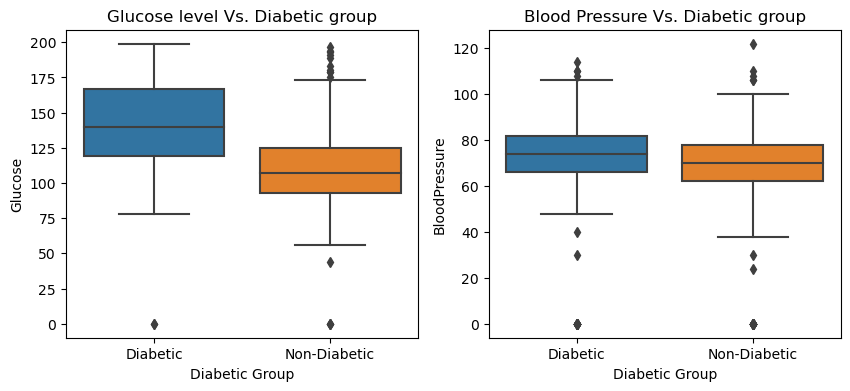

In [25]:
#plotting a boxplot of Glucose and blood pressure against the diabetic group
fig, ax = plt.subplots(1, 2, figsize=[10,4])
sns.boxplot(data=df, x='DiabeticGroup', y='Glucose', ax=ax[0])
sns.boxplot(data=df, x='DiabeticGroup', y='BloodPressure', ax=ax[1])

ax[0].set_title('Glucose level Vs. Diabetic group')
ax[0].set_xlabel('Diabetic Group')

ax[1].set_title('Blood Pressure Vs. Diabetic group')
ax[1].set_xlabel('Diabetic Group')
plt.show()

### From the box plot
- The diabetic patient has glucose leven that ranges from 120 to 160 with mean aroun 140. while non-diabetic patients have glucose level of smaller range between 90 - 125 with mean around 110

- The diabetic and non-diabetic patients have close mean blood pressure
- There are outliers both in the glucose and blood pressure

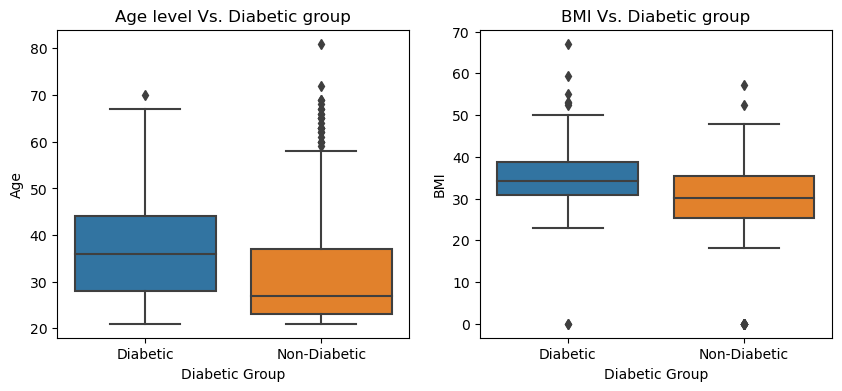

In [26]:
#plotting a boxplot of Age and BMI against the diabetic group
fig, ax = plt.subplots(1, 2, figsize=[10,4])
sns.boxplot(data=df, x='DiabeticGroup', y='Age', ax=ax[0])
sns.boxplot(data=df, x='DiabeticGroup', y='BMI', ax=ax[1])

ax[0].set_title('Age level Vs. Diabetic group')
ax[0].set_xlabel('Diabetic Group')

ax[1].set_title('BMI Vs. Diabetic group')
ax[1].set_xlabel('Diabetic Group')
plt.show()

### From the box plot
- The age of diabetic patients ranges from 28 to 44 with mean around 37. While non-diabetic patients have mean age around 28

- The mean body mass index of diabetics patients is around 35 while for non-diabetic patients it is 30
- There are outliers in the body mas index also in the age at over 80 years

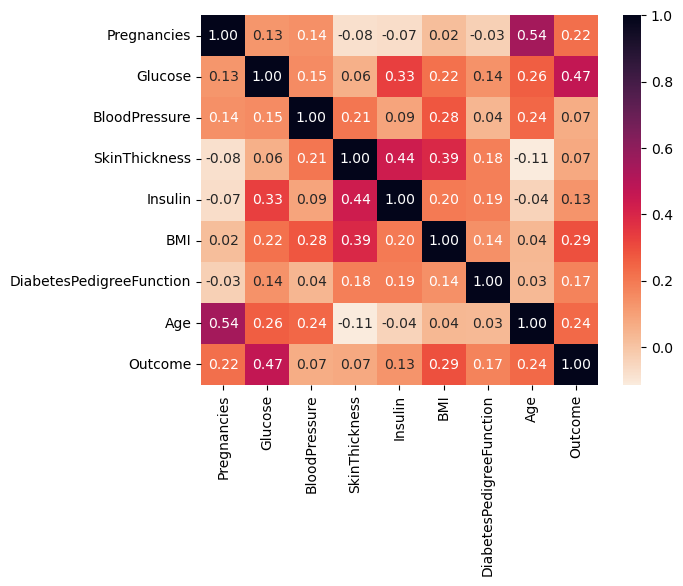

In [27]:
#plotting a heatmap of the correlation of the numerical features
num_var = list(df.select_dtypes(include=['int64', 'float64']).columns)
sns.heatmap(df[num_var].corr(), cmap='rocket_r', annot=True, fmt='.2f');

- From the correlation matrix, the features appears not to be correlated with each other

# Data Preprocessing

In [29]:
#select the data to be preprocessed
data = df.iloc[:, 0:9]
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


## Dealing with outliers (zero's) by imputing it with mean

In [30]:
#checking for features with zero as input and counting it
print('No of zeros in Glucose = ', (data['Glucose']==0).sum())
print('No of zeros in BloodPressure = ', (data['BloodPressure']==0).sum())
print('No of zeros in SkinThickness = ', (data['SkinThickness']==0).sum())
print('No of zeros in Insulin = ', (data['Insulin']==0).sum())

No of zeros in Glucose =  5
No of zeros in BloodPressure =  35
No of zeros in SkinThickness =  227
No of zeros in Insulin =  374


- It is not logical for the values of Glucose, Blood pressure, Skin thickness and insulin of a patient to be zero. 
- Since dropping the rows with zeros will affect the size of the dataset, it is best to impute it with the mean

In [31]:
#imputing the values of zeros with the mean
data['Glucose'] = data['Glucose'].apply(lambda x: data['Glucose'].mean() if x ==0 else x)
data['BloodPressure'] = data['BloodPressure'].apply(lambda x: data['BloodPressure'].mean() if x ==0 else x)
data['SkinThickness'] = data['SkinThickness'].apply(lambda x: data['SkinThickness'].mean() if x ==0 else x)
data['Insulin'] = data['Insulin'].apply(lambda x: data['Insulin'].mean() if x ==0 else x)

In [32]:
### Check if it has been imputed
print('No of zeros in Glucose = ', (data['Glucose']==0).sum())
print('No of zeros in BloodPressure = ', (data['BloodPressure']==0).sum())
print('No of zeros in SkinThickness = ', (data['SkinThickness']==0).sum())
print('No of zeros in Insulin = ', (data['Insulin']==0).sum())

No of zeros in Glucose =  0
No of zeros in BloodPressure =  0
No of zeros in SkinThickness =  0
No of zeros in Insulin =  0


## Importing the modules

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.feature_selection import SelectKBest, chi2
from xgboost import XGBClassifier

### Selecting the input features and target

In [34]:
#selecting input features
X = data.drop('Outcome', axis=1)
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.0,79.799479,26.6,0.351,31


In [35]:
#Selecting the target 
y = data['Outcome']
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

### Spliting the dataset

In [36]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Feature Scaling

In [37]:
#instantiate the scaler
scaler = StandardScaler()

In [38]:
# Fit and transform the X_train
X_train = scaler.fit_transform(X_train)

In [39]:
#transform the X_test
X_test = scaler.transform(X_test)

# Model Building

- Models to use include **LogisticRegression, RandomForest, DecisionTree, SVC, KNN, NaiveBayes and XGBoost**

In [40]:
#Define the models using a json object
models = {
    'LogisticRegression': {
        'model': LogisticRegression()
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier()
    },
    
    'RandomForest': {
        'model': RandomForestClassifier()
    },
    
    'NaiveBayes': {
        'model': GaussianNB()
    },
    
    'KNN': {
        'model': KNN()
    },
    
    'SVC': {
        'model': SVC()
    },
    
    'XGBoost': {
        'model': XGBClassifier()
    }
}

 ### Define a function to build the models and return accuracy, f1_score, precision and recall score

In [41]:
#define a function to build the models

def model_score(models, X_train, X_test, y_train, y_test):
    '''
    This model takes the models, X_train, X_test, y_train, y_test and return accuracy score, precision and recall score
    and f1 score
    '''
    #define an empty list
    score_param = []
    
    #create a for loop for the models
    for model_name, mod in models.items():
        #instantiate the model
        model = mod['model']
        
        #fit the model
        model.fit(X_train, y_train)
        
        #predict the y_test
        y_pred = model.predict(X_test)
        
        #return the scores
        
        acc_score = accuracy_score(y_test, y_pred)
        p_score = precision_score(y_test, y_pred)
        r_score = recall_score(y_test, y_pred)
        f_score = f1_score(y_test, y_pred)
        
        #append the scores to the score_param
        score_param.append({
            'model_name': model_name,
            'accuracy_score': acc_score.round(2),
            'precision_score': p_score.round(2),
            'recall_score': r_score.round(2),
            'f1_score': f_score.round(2)
        })
    return score_param

In [42]:
#call the function to build the model
model_scores = model_score(models, X_train, X_test, y_train, y_test)

In [43]:
#convert the model scores to dataframe
model_score_data = pd.DataFrame(model_scores)
model_score_data

,model_name,accuracy_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.77,0.69,0.65,0.67
1,DecisionTree,0.75,0.62,0.73,0.67
2,RandomForest,0.74,0.64,0.64,0.64
3,NaiveBayes,0.75,0.64,0.71,0.67
4,KNN,0.76,0.66,0.67,0.67
5,SVC,0.73,0.64,0.55,0.59
6,XGBoost,0.71,0.59,0.65,0.62


### Plot a barchar of the accuracy score

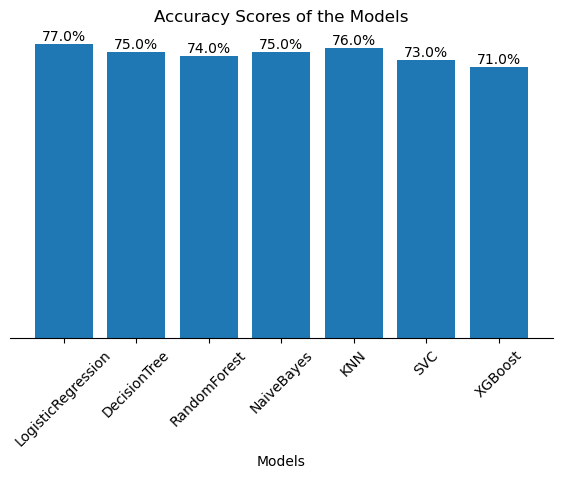

In [44]:
# plot a barchar of the accuracy score
fig, ax = plt.subplots(figsize=[7,4])
ax.bar(data=model_score_data, x='model_name', height='accuracy_score')

ax.set_title('Accuracy Scores of the Models')
ax.set_xlabel('Models')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.xaxis.set_tick_params(rotation=45)
for index, values in enumerate(model_score_data['accuracy_score'].values):
    ax.annotate(str(values*100)+'%', xy=(index, values+0.02), ha='center', va='center')
plt.show()

### From the bar chart
- The models with the better accuracy scores are
1. Logistic Regression (77%)
2. KNN (76%)
3. Naive Bayes (75%)
4. Decision Tree (75%)
5. Random Forest (74%)

# Model Evaluation
- Here the model will be evaluated using cross validation to check its ability to generalize well on new data

### Define a function to perform the cross validation

In [45]:
#define the cross validation function
def cross_val(models, X_train, y_train, k):
    '''
    This function takes the model and perform a n-fold cross validation on the models
    '''
    
    #define a empty list
    score_param = []
    
    #create a for loop for the cross validation
    for model_name, mod in models.items():
        #instantiate the model
        model = mod['model']
        
        #calculate the cv mean and standard deviation scores
        score_cv = cross_val_score(model, X_train, y_train, cv=k)
        score_cv_mean = score_cv.mean().round(2)
        score_cv_std = score_cv.std().round(2)
        
        #append the scores to score_param
        score_param.append({
            'model_name': model_name,
            'cv_mean_score': score_cv_mean,
            'cv_std_score': score_cv_std
        })
    return score_param

In [46]:
#call the function to perform a five fold cross_validation
cv_score = cross_val(models, X_train, y_train, 5)

#convert the cv_score to dataframe
cv_score_data = pd.DataFrame(cv_score)
cv_score_data

,model_name,cv_mean_score,cv_std_score
0,LogisticRegression,0.77,0.03
1,DecisionTree,0.69,0.01
2,RandomForest,0.77,0.03
3,NaiveBayes,0.74,0.03
4,KNN,0.76,0.02
5,SVC,0.76,0.03
6,XGBoost,0.75,0.02


### Plot a barchar of the cross validation score

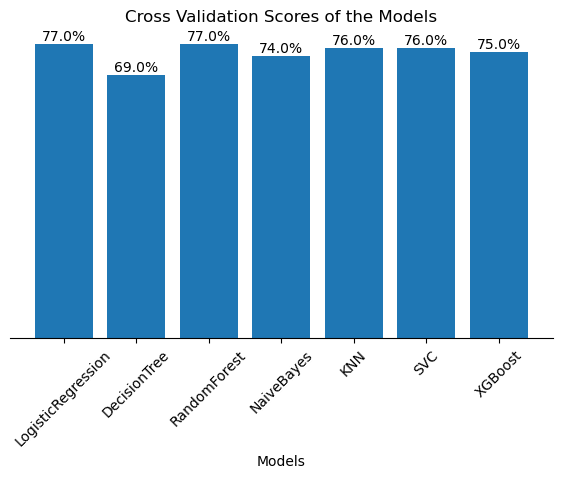

In [47]:
# plot a barchar of the accuracy score
fig, ax = plt.subplots(figsize=[7,4])
ax.bar(data=cv_score_data, x='model_name', height='cv_mean_score')

ax.set_title('Cross Validation Scores of the Models')
ax.set_xlabel('Models')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.xaxis.set_tick_params(rotation=45)
for index, values in enumerate(cv_score_data['cv_mean_score'].values):
    ax.annotate(str(values*100)+'%', xy=(index, values+0.02), ha='center', va='center')
plt.show()

### From the bar chart 
- The models with the better mean scores from cross validation are
1. Logistic Regression (77%)
2. Random Forest (77%)
3. SVC (76%)
4. KNN (76%)
5. XGBoost (75%)

# Model Tuning

## Hyperparameter tuning of the models

In [48]:
#defining the models and the parameter grid values

param_models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'multi_class': ['ovr'],
            'solver': ['liblinear']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.001, 0.01, 0.1, 1, 10],
            'gamma': [0.01, 0.1, 1, 10]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'], 
            'max_depth': np.arange(2, 10, 2),
            'max_features': ['sqrt', 'log2']
            
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'], 
            'max_depth': np.arange(2, 10, 2),
            'max_features': ['sqrt', 'log2'],
            'n_estimators': np.arange(20, 210, 10)
            
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(0, -9, num=100)
        }
    },
    'KNN': {
        'model':KNN(),
        'params': {
            'n_neighbors': np.arange(2, 10, 1)
        }
    },
    
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': np.arange(100, 200, 20),
            'max_depth': [2,4,6],
            'learning_rate': [0.1, 0.01, 0.001]
        }
    }
}

In [49]:
# create a for loop to perform hyperparameter tunning
grid_score = []
for model_name, mp in param_models.items():
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5)
    grid_search.fit(X_train, y_train)
    grid_score.append({
        'model_name': model_name,
        'best_score': grid_search.best_score_,
        'best_parameter': grid_search.best_params_
    })

In [50]:
grid_score

[{'model_name': 'LogisticRegression',
  'best_score': 0.7671064907370384,
  'best_parameter': {'multi_class': 'ovr', 'solver': 'liblinear'}},
 {'model_name': 'SVM',
  'best_score': 0.7719978675196588,
  'best_parameter': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}},
 {'model_name': 'DecisionTree',
  'best_score': 0.7426895908303346,
  'best_parameter': {'criterion': 'gini',
   'max_depth': 6,
   'max_features': 'log2'}},
 {'model_name': 'RandomForest',
  'best_score': 0.7883113421298147,
  'best_parameter': {'criterion': 'gini',
   'max_depth': 6,
   'max_features': 'log2',
   'n_estimators': 70}},
 {'model_name': 'NaiveBayes',
  'best_score': 0.7540983606557378,
  'best_parameter': {'var_smoothing': 0.8111308307896871}},
 {'model_name': 'KNN',
  'best_score': 0.7606157536985206,
  'best_parameter': {'n_neighbors': 5}},
 {'model_name': 'XGBoost',
  'best_score': 0.7882846861255497,
  'best_parameter': {'learning_rate': 0.1,
   'max_depth': 2,
   'n_estimators': 120}}]

In [51]:
#convert the grid_score to dataframe
gs_data = pd.DataFrame(grid_score)
gs_data.columns = ['model_name', 'best_score', 'best_parameter']
gs_data

,model_name,best_score,best_parameter
0,LogisticRegression,0.767106,"{'multi_class': 'ovr', 'solver': 'liblinear'}"
1,SVM,0.771998,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}"
2,DecisionTree,0.742690,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."
3,RandomForest,0.788311,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."
4,NaiveBayes,0.754098,{'var_smoothing': 0.8111308307896871}
5,KNN,0.760616,{'n_neighbors': 5}
6,XGBoost,0.788285,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti..."


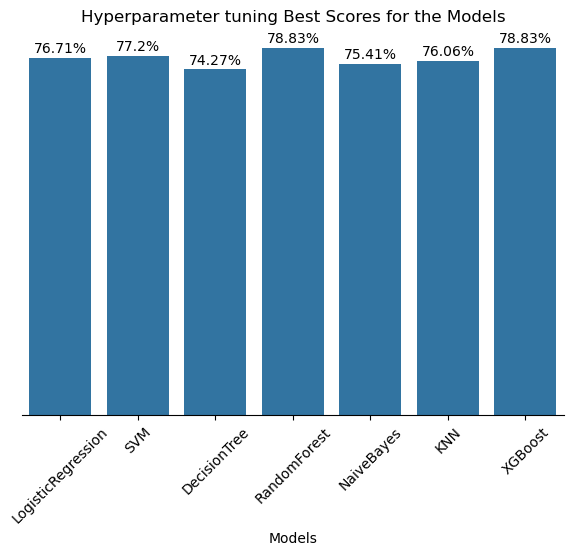

In [52]:
#plot a barchart of the model hyperparameter tuning best score

fig, ax =plt.subplots(figsize=[7,5])
base_color = sns.color_palette()[0]

sns.barplot(data=gs_data, x='model_name', y='best_score', color=base_color)
plt.xticks(rotation=45)

ax.set_title('Hyperparameter tuning Best Scores for the Models')
ax.set_xlabel('Models')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)

for index, values in enumerate(gs_data['best_score']):
    ax.annotate(str(round(values*100, 2))+'%', xy=(index, values+0.02), va='center', ha='center')
plt.show()

### From the bar chart 
- The models with the better mean scores from **hyperparameter tuning** are
1. Random Forest (78.83%)
2. XGBoost (78.83%)
3. SVC (77.2%)
4. Logistic Regression (76.71%)
5. KNN (76.06%)

# Model accuracy with the best hyperparameter

## Random Forest (with best hyperparameter)

In [63]:
#define the model with best hyperparameter

clf_rf = RandomForestClassifier(criterion='gini', max_depth=6, max_features='log2', n_estimators=70)

#fit the model
clf_rf.fit(X_train, y_train)

#predict the y_test
y_pred_rf = clf_rf.predict(X_test)

#check accuracy score
rf_acc_score = accuracy_score(y_test, y_pred_rf)
print('Accuracy score: ', rf_acc_score)

Accuracy score:  0.7597402597402597


### Confusion Matrix

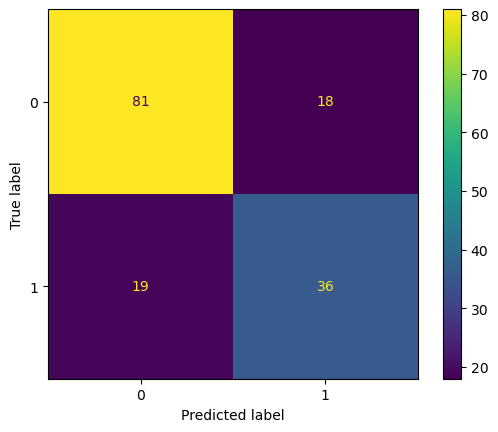

In [64]:
#print the confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

### ROC Curve

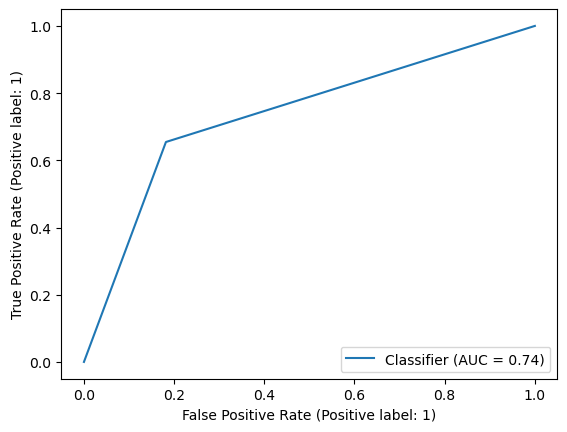

In [65]:
#display the ROC curve

RocCurveDisplay.from_predictions(y_test, y_pred_rf)

## Logistic Regression (with best hyperparameter)

In [66]:
#define the model with best hyperparameter
np.random.seed(42)
clf_lr = LogisticRegression(multi_class='ovr', solver='liblinear')

#fit the model
clf_lr.fit(X_train, y_train)

#predict the y_test
y_pred_lr = clf_lr.predict(X_test)

#check accuracy score
lr_acc_score = accuracy_score(y_test, y_pred_lr)
print('Accuracy score: ', lr_acc_score)

Accuracy score:  0.7727272727272727


### Confusion Matrix

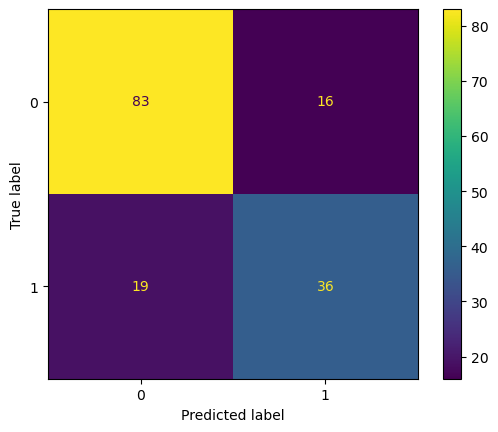

In [67]:
#print the confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

### ROC Curve

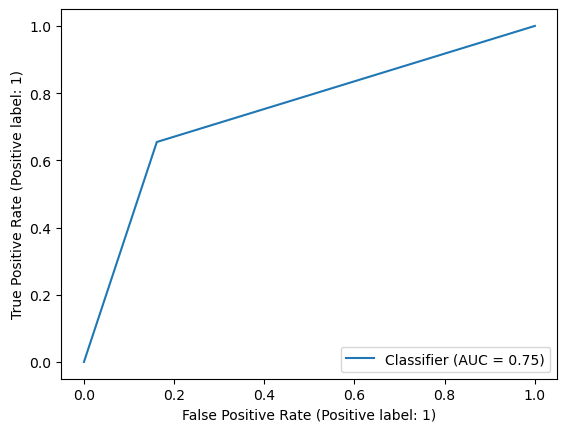

In [68]:
#display the ROC curve

RocCurveDisplay.from_predictions(y_test, y_pred_lr)

## Support Vector Machine (with best hyperparameter)

In [72]:
#define the model with best hyperparameter

clf_svc = SVC(C=1, gamma=0.1, kernel='rbf')

#fit the model
clf_svc.fit(X_train, y_train)

#predict the y_test
y_pred_svc = clf_svc.predict(X_test)

#check accuracy score
svc_acc_score = accuracy_score(y_test, y_pred_svc)
print('Accuracy score: ', svc_acc_score)

Accuracy score:  0.7467532467532467


### Confusion Matrix

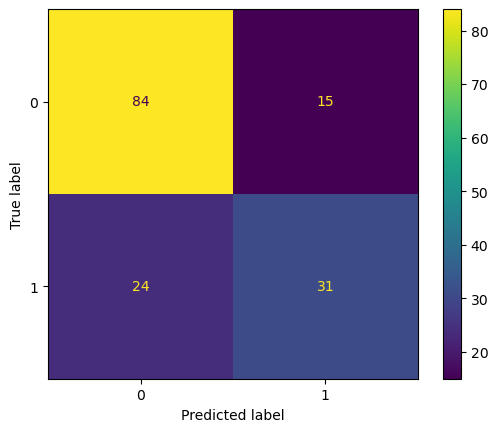

In [73]:
#print the confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc)

### ROC Curve

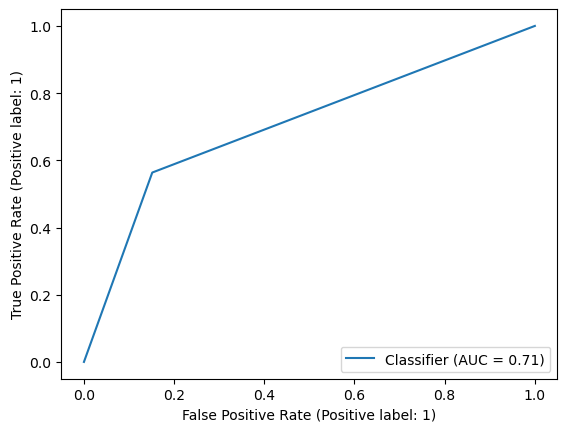

In [82]:
#display the ROC curve

RocCurveDisplay.from_predictions(y_test, y_pred_svc)

## XGBOOST(with best hyperparameter)

In [80]:
#define the model with best hyperparameter

clf_xg = XGBClassifier(learning_rate=0.1, n_estimators=120, max_depth=2)

#fit the model
clf_xg.fit(X_train, y_train)

#predict the y_test
y_pred_xg = clf_xg.predict(X_test)

#check accuracy score
xg_acc_score = accuracy_score(y_test, y_pred_xg)
print('Accuracy score: ', xg_acc_score)

Accuracy score:  0.7337662337662337


### Confusion Matrix

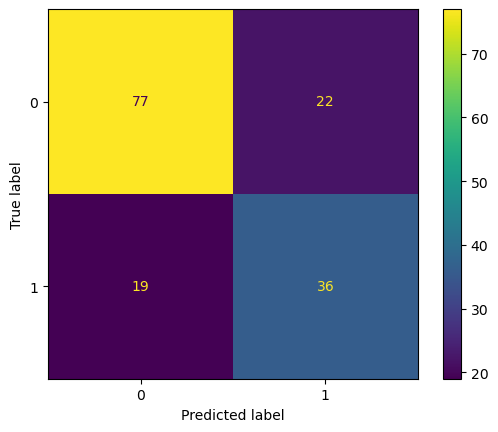

In [83]:
#print the confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xg)

### ROC Curve

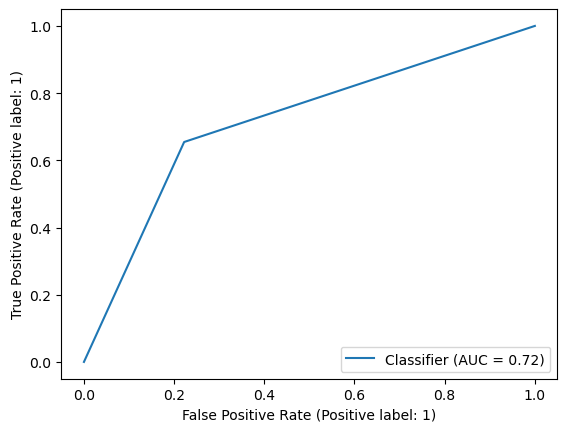

In [84]:
#display the ROC curve

RocCurveDisplay.from_predictions(y_test, y_pred_xg)

## Accuracy Score of the top three Models

In [85]:
#create a dictionary of the scores
acc_scores = {'scores': [rf_acc_score, lr_acc_score, svc_acc_score]}
 

#convert the dictionary to dataframe
top_model_scores = pd.DataFrame(acc_scores)
top_model_scores.index = ['Random Forest', 'Logistic Regression', 'SVC']
top_model_scores

,scores
Random Forest,0.759740
Logistic Regression,0.772727
SVC,0.746753


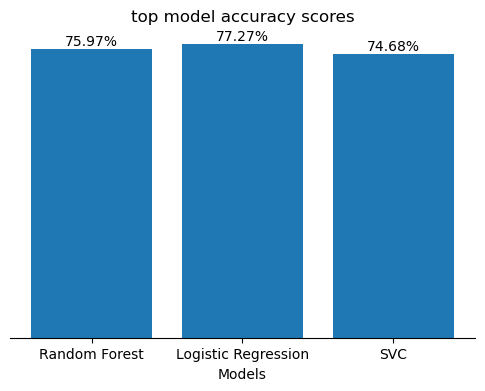

In [86]:
#plotting a bar chart
fig, ax = plt.subplots(figsize=[6,4])
ax.bar(x=top_model_scores['scores'].index, height=top_model_scores['scores'].values)

ax.set_title('top model accuracy scores')
ax.set_xlabel('Models')
ax.set_ylabel('scores')

ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)

for index, values in enumerate(top_model_scores['scores']):
    ax.annotate(str(round((values*100), 2))+'%', xy=(index, values+0.02), ha='center', va='center')

plt.show()

### From the bar chart
- The **Logistic Regression** is the best model for the classification since it has accuracy score of 77.27% and an area under curve (AUC) score of 0.75 better than the Random Forest model. Also its cross validation score(77%) same as Random Forest

# Feature Importance

In [87]:
#create the features column
features = pd.Series(X.columns)

#create the feature importance score column
importances = pd.Series(clf_rf.feature_importances_)

#create a dataframe
feat_importances = pd.concat([features, importances], axis=1)

#assign column names
feat_importances.columns = ['features', 'importances']

feat_importances

,features,importances
0,Pregnancies,0.053148
1,Glucose,0.371951
2,BloodPressure,0.051691
3,SkinThickness,0.049620
4,Insulin,0.073010
5,BMI,0.161017
6,DiabetesPedigreeFunction,0.081029
7,Age,0.158534


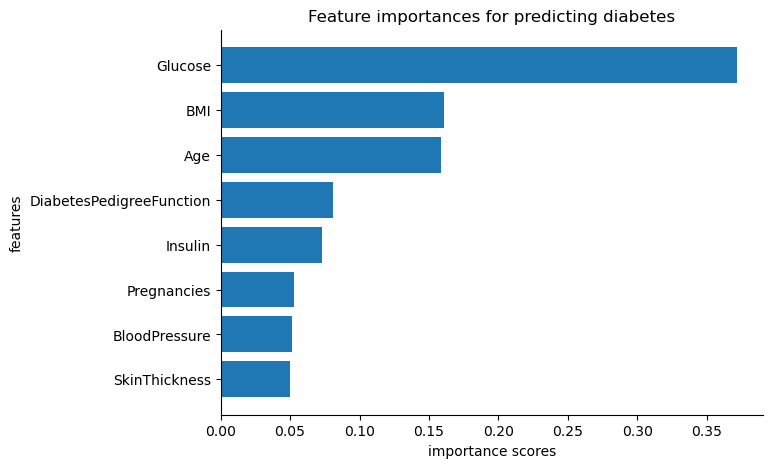

In [88]:
#plot a barchart
fig, ax = plt.subplots(figsize=[7,5])
ax.barh(data=feat_importances.sort_values('importances', ascending=True), y='features', width='importances')
ax.set_title('Feature importances for predicting diabetes')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('importance scores')
ax.set_ylabel('features')
plt.show()

### From the bar chart
- The top five(5) features that have importance to the prediction of diabetes are
1. Glucose
2. BMI
3. Age
4. Diabetes Pedigree Function
5. Insulin

# Feature Selection
- Using SelectKBest class

In [89]:
#select the best features

BestFeatures = SelectKBest(score_func=chi2, k=8)

#fit
select = BestFeatures.fit(X, y)

In [90]:
scores_feat = pd.Series(select.scores_)
features_feat = pd.Series(X.columns)
B_feat = pd.concat([features_feat, scores_feat], axis=1)
B_feat.columns = ['features', 'score']
B_feat.sort_values('score', ascending=False)

,features,score
4,Insulin,1798.088682
1,Glucose,1418.660636
7,Age,181.303689
5,BMI,127.669343
0,Pregnancies,111.519691
3,SkinThickness,81.917622
2,BloodPressure,41.394665
6,DiabetesPedigreeFunction,5.392682


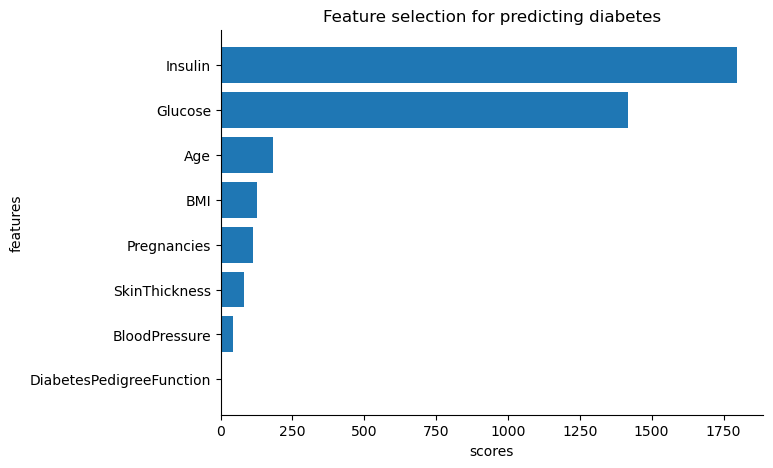

In [91]:
#plot a barchart
fig, ax = plt.subplots(figsize=[7,5])
ax.barh(data=B_feat.sort_values('score', ascending=True), y='features', width='score')
ax.set_title('Feature selection for predicting diabetes')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('scores')
ax.set_ylabel('features')
plt.show()

### From the bar chart
- The top five(5) features that have importance to the prediction of diabetes are
1. Insulin
2. Glucose
3. Age
4. BMI
5. Pregnancies

# Conclusion

## Best Model
 - The best model for the prediction is the **Logistic Regression**. It has an accuracy score of 77.27% and AUC score of 0.75 which is better than Random Forest.
 - Also, from the model evaluation, the Logistic Regression did well with score of 77%
 
## Best Features
 - The top five features that help in predicting diabeties are Insulin, Glucose, Age, BMI and Pregnancies.
 - But, the top two features that stood out is the Insulin and Glucose which of course are the dominant features that determines if a patients is diabetic or not.
 - Insulin is an hormone that regulates blood glucose which when not produce will result in high level of glucose in the blood and this results in diabetes